A. Генератор точек в круге
Ограничение времени	1 секунда
Ограничение памяти	64Mb
Ввод	стандартный ввод или input.txt
Вывод	стандартный вывод или output.txt
Петя написал два генератора точек в круге:

def generate1():  
    a = uniform(0, 1)  
    b = uniform(0, 1)  
    return (a * cos(2 * pi * b), a * sin(2 * pi * b))

def generate2():  
    while True:  
        x = uniform(-1, 1)  
        y = uniform(-1, 1)  
        if x ** 2 + y ** 2 > 1:  
            continue  
        return (x, y)
Даны 100 наборов по 1000 точек, каждый набор сгенерирован каким-то одним из этих двух алгоритмов. Необходимо определить для каждого набора, первый или второй алгоритм использовался для его генерации.
Для того, чтобы получить ОК по этой задаче, надо предсказать правильный генератор хотя бы для 98 наборов.
Формат ввода
Даны 100 строк. Каждая строка отвечает за свой набор точек.
В каждой строке находится 2000 действительных чисел (
−
1
≤
a
i
≤
1
), разделённых пробелом. Точки идут подряд, то есть формат строки: 
x
0
  
y
0
  
x
1
  
y
1
  
x
2
  
y
2
  
…
  
x
9
9
9
  
y
9
9
9
Формат вывода
Нужно вывести 100 строк, в каждой из которой должно быть 1 число: 1 или 2, в зависимости от того, первым или вторым генератором был сгенерирован данный набор точек.

In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl

In [42]:
import math

In [43]:
N=1000

def generate1():  
    a = st.uniform(0,1).rvs()
    b = st.uniform(0,1).rvs() 
    return (a * np.cos(2 * math.pi * b), a * np.sin(2 * math.pi * b))
def generate2():  
    while True:  
        x = st.uniform(-1,2).rvs()   
        y = st.uniform(-1,2).rvs()  
        if x ** 2 + y ** 2 > 1:  
            continue  
        return (x, y)

g1 = pd.DataFrame(columns=['x','y'])
g2 = pd.DataFrame(columns=['x','y'])

for i in range(0,N):
    g1.loc[i] = generate1()
    g2.loc[i] = generate2()

In [44]:
g1

,x,y
0,-0.543510,0.630379
1,0.304956,0.756153
2,0.867385,0.336219
3,0.195059,-0.122469
4,0.029259,0.005836
...,...,...
995,0.108270,0.304899
996,0.058733,-0.853464
997,0.796155,-0.269795
998,-0.411595,-0.790708


In [45]:
sns.set(rc={'figure.figsize':(9,9)})

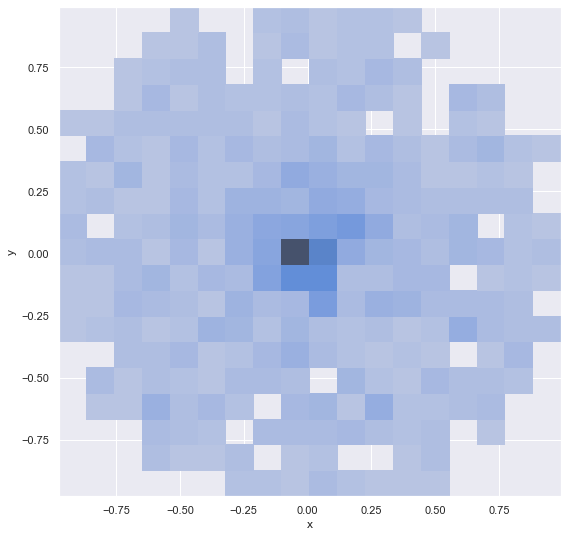

In [46]:
sns.histplot(x=g1.x,y=g1.y)

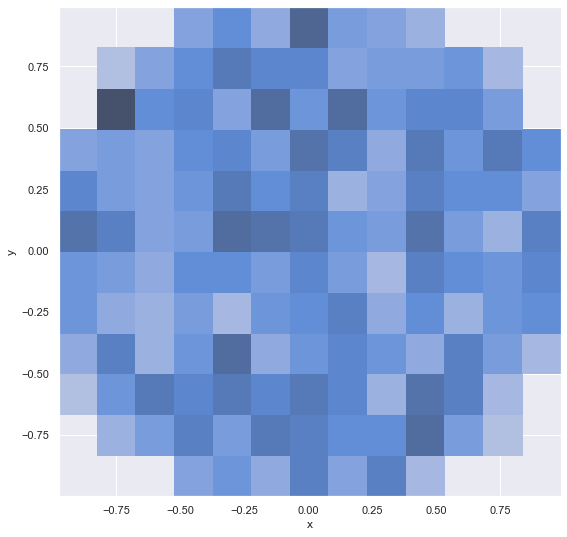

In [47]:
sns.histplot(x=g2.x,y=g2.y)

In [48]:
sum(g1['x']**2+g1['y']**2)

341.96808165868975

In [49]:
sum(g2['x']**2+g2['y']**2)

515.6760797465589

In [ ]:
reader = open('input.txt', 'r')
for _ in range(100):	
	sample = [float(n) for n in reader.readline().split( )]
	var = 0
	for i in range(len(sample)):
		var += sample[i]**2
	if var < 400:
		print(1)
	else:
		print(2)
reader.close()